# API Comparison for Anomaly Detection in Time Series
Luminol(오픈 소스)를 포함한 총 3가지의 환경에서 time series 에 대한 anomaly detection 성능비교를 진행할 것이다.

* Luminol python library
* Amazon Web Service SageMaker
* Microsoft Azure

In [2]:
#existing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, datetime

#custom library
import utils_

# Dataset

sample dataset

In [17]:
A1_ = pd.read_csv('../anomaly_detection/dataset/' + utils_.data_sel('A1','7'))
A2_ = pd.read_csv('../anomaly_detection/dataset/' + utils_.data_sel('A2','7'))
A3_ = pd.read_csv('../anomaly_detection/dataset/' + utils_.data_sel('A3','7'))
A4_ = pd.read_csv('../anomaly_detection/dataset/' + utils_.data_sel('A4','7'))

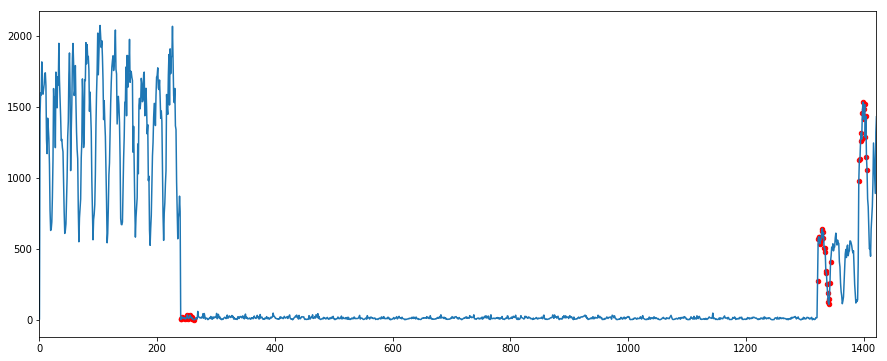

In [22]:
A1_['value'].plot(figsize=((15,6)))
ano_a1 = A1_[A1_['is_anomaly'] == 1]
plt.scatter(x=ano_a1.index, y=ano_a1['value'], c='red', s=20)

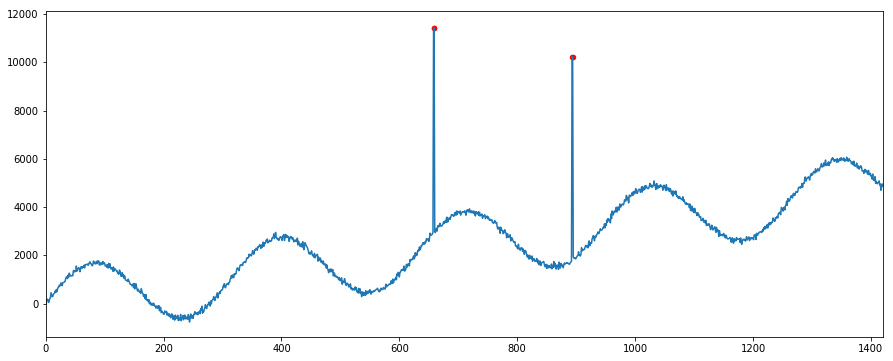

In [19]:
A2_['value'].plot(figsize=((15,6)))
ano_a2 = A2_[A2_['is_anomaly'] == 1]
plt.scatter(x=ano_a2.index, y=ano_a2['value'], c='red', s=20)

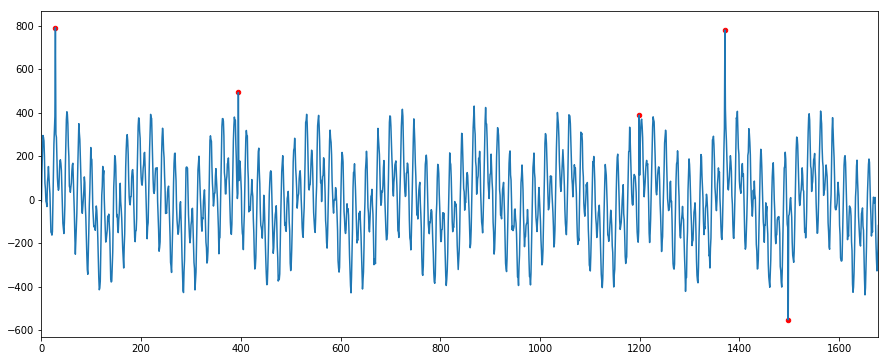

In [20]:
A3_['value'].plot(figsize=((15,6)))
ano_a3 = A3_[A3_['anomaly'] == 1]
plt.scatter(x=ano_a3.index, y=ano_a3['value'], c='red', s=20)

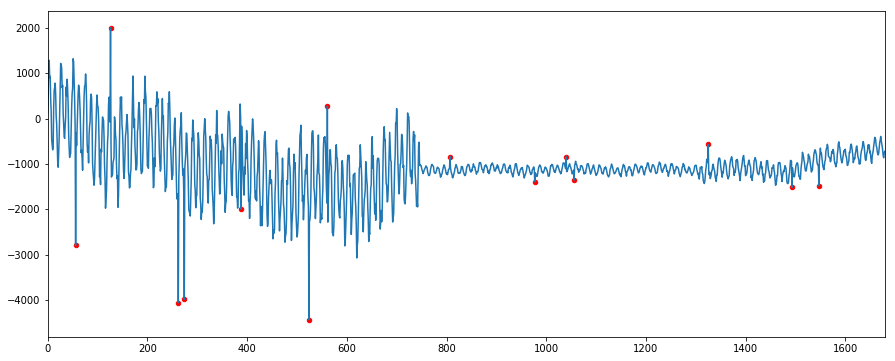

In [21]:
A4_['value'].plot(figsize=((15,6)))
ano_a4 = A4_[A4_['anomaly'] == 1]
plt.scatter(x=ano_a4.index, y=ano_a4['value'], c='red', s=20)

# Result
각 API 별 f1 score와 True Positive, False Positive(이상이라고 잘못 진단한 경우), False Negative(이상이라고 진단하지 못한 경우)를 시각화한 결과는 다음과 같다.

## Luminol

AP score for luminol is: 0.706981


0.7069805194805194

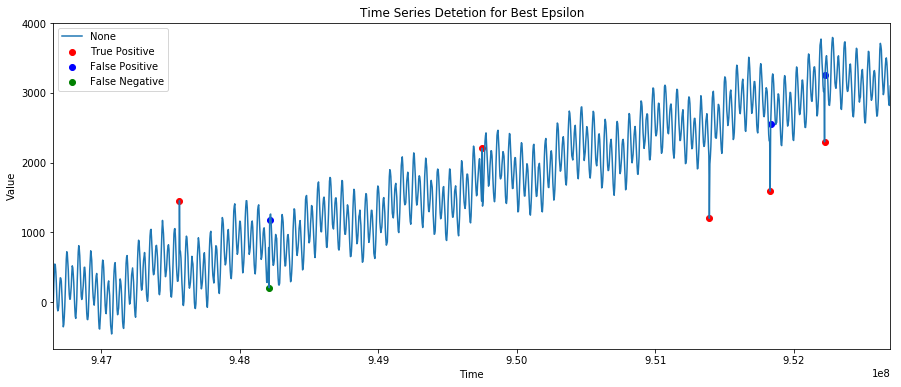

In [23]:
utils_.inference_('luminol', 'A3', '3', graph=True)

# Azure

AP score for azure is: 1.000000


1.0

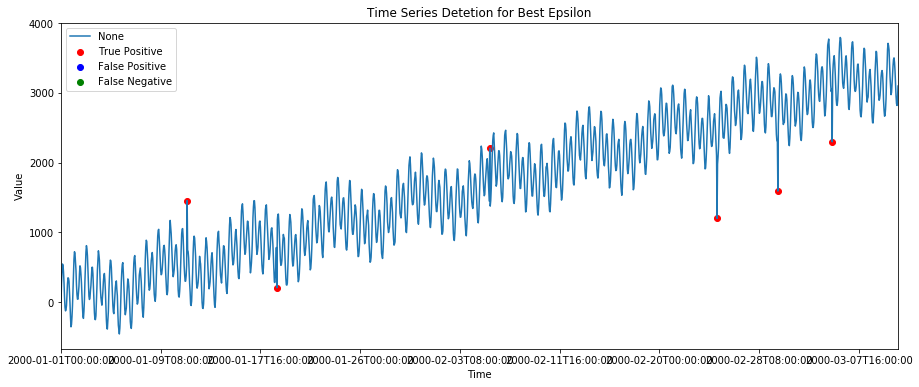

In [24]:
utils_.inference_('azure', 'A3', '3', graph=True)

# Compare Results

In [26]:
#Store
bench = {'A1': 67,'A2': 100,'A3': 100,'A4': 100}
lu_ap = []
az_ap = []
aws_ap = []
print("AP scores for Lumiuol and Azure")
for key in bench.keys():
    print("%s Benchmark Detection"%key)
    print("num  lu     az     aws")
    for num in range(bench[key]):
        lu_ap.append(utils_.inference_('luminol', key, str(num + 1)))
        az_ap.append(utils_.inference_('azure', key, str(num + 1)))
#         aws_ap.append(utils_.inference_('aws', key, str(num + 1)))        
        print("%d  %.3f  %.3f  %.3f"%(num + 1, lu_ap[-1], az_ap[-1], aws_ap[-1]))
    print('\n\n')

AP score for luminol is: 0.995833
AP score for azure is: 0.400000
AP score for luminol is: 1.000000
AP score for azure is: 0.222222
AP score for luminol is: 0.706981
AP score for azure is: 1.000000
AP score for luminol is: 0.528952
AP score for azure is: 0.093750


In [ ]:
lu_A1 = np.delete(lu_ap[:67].copy(), np.where(np.isnan(lu_ap) == True))
lu_A2 = lu_ap[67:167].copy()
lu_A3 = lu_ap[167:267].copy()
lu_A4 = lu_ap[267:367].copy()

az_A1 = np.delete(az_ap[:67].copy(), np.where(np.isnan(lu_ap) == True))
az_A2 = az_ap[67:167].copy()
az_A3 = az_ap[167:267].copy()
az_A4 = az_ap[267:367].copy()

# aws_A1 = np.delete(aws_ap[:67].copy(), np.where(np.isnan(lu_ap) == True))
# aws_A2 = aws_ap[67:167].copy()
# aws_A3 = aws_ap[167:267].copy()
# aws_A4 = aws_ap[267:367].copy()

In [ ]:
print("A1 mean for Lu: %.2f"%np.mean(lu_A1))
print("A2 mean for Lu: %.2f"%np.mean(lu_A2))
print("A3 mean for Lu: %.2f"%np.mean(lu_A3))
print("A4 mean for Lu: %.2f\n"%np.mean(lu_A4))

print("A1 mean for az: %.2f"%np.mean(az_A1))
print("A2 mean for az: %.2f"%np.mean(az_A2))
print("A3 mean for az: %.2f"%np.mean(az_A3))
print("A4 mean for az: %.2f"%np.mean(az_A4))

print("A1 mean for aws: %.2f"%np.mean(aws_A1))
print("A2 mean for aws: %.2f"%np.mean(aws_A2))
print("A3 mean for aws: %.2f"%np.mean(aws_A3))
print("A4 mean for aws: %.2f"%np.mean(aws_A4))

Text(0.5, 1.0, 'AP Score for each Benchmark')

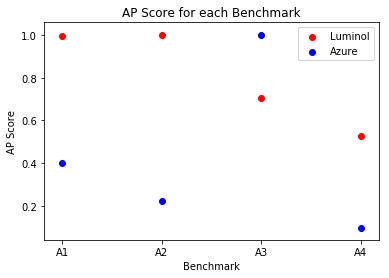

In [37]:
plt.scatter(x=bench, y=lu_ap, c='red', label='Luminol')
plt.scatter(x=bench, y=az_ap, c='blue', label='Azure')
plt.scatter(x=bench, y=az_ap, c='blue', label='AWS')

plt.legend()
plt.xlabel('Benchmark')
plt.ylabel('AP Score')
plt.title("AP Score for each Benchmark")

# AWS-Will be Revisied in Later

In [30]:
aw_cpm = aws.aws()
aw_cpm.set_data(abn_pt_cpm, y_cpm, dt_cpm)

aw.inference(
            bucket = '[bucket_name]',
            prefix = '[prefix_to_bucket]',
            execution_role = '[your_execution_role]',
            instance_type = '[instance_type]',
            aws_access_key_id = '[access_key_id]',
            aws_secret_access_key = '[secret_access_key]',
            region_name = '[your_region]'
)

aws_f1_cpm, aws_c_true, aws_c_score = aw_cpm.f1_metrics()
print("F1 score for aws is: %f" %aws_f1_cpm)

utils_.vis(y_cpm, dt_cpm, aws_c_true, aws_c_score)

//////boto3 session generating

//////check if the bucket exists
Training input/output will be stored in: s3://doyeongkim-anomaly-detection/sagemaker/rcf-benchmarks

//////define sagemaker session

//////define rcf model

//////fitting rcf model


ParamValidationError: Parameter validation failed:
Invalid type for parameter ResourceConfig.InstanceType, value: None, type: <class 'NoneType'>, valid types: <class 'str'>